**Classification of Tournamen Level based on Performance Metrics**

Pranathi Kanisetty, Nicholas Neumann, Juvraj Toor

Data set: *Game results for Top 500 Players from 2017 to 2019*.

**Introduction**


The dataset contains information about the games played by the top 500 tennis players in the world, between 2017 and 2019. The data set includes information about tournament dates, tournament names, minutes played, winner and loser rankings, etc which was collected by Jeff Sackmann. 


Our first predictor variable is winner aces. An ace in tennis is a serve that “successfully lands in the service box” that the receiver is not able to get their racquet to (Crim, n.d.). As a result, the server wins a point. Our second predictor variable is the number of successful first serves for winners. On a successful serve, the server gets a point. The variable we are trying to predict is the tournament level. There are four different tournament levels: G = Grand Slams, M = Masters 1000s, D = Davis Cup, and A = Other tour-level events. 


Using this data, the predictive question we will try to answer is: Can we predict the tournament level using the winner aces and the number of successful first serves for winners on hard surfaces for French players?

**Preliminary Exploratory Data Analysis**


We used two histograms with the x-axis for one being Winner Successful Serves and the other being Winner Aces. The y-axis is the frequency of how many times a numerical value was represented for both graphs.


In [3]:
# Loading the Tidyverse Library
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# Reading the Data from Relative Storage
data <- read_csv("data/atp2017-2019.csv")
data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
6,2019-M020,Brisbane,Hard,32,A,20181231,294,105453,2,⋯,53,37,13,12,6,9,9,3590,19,1835
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715


In [5]:
# Cleaning the Data

options(repr.plot.width = 12, repr.plot.height = 12)

clean_data <- select(data, tourney_level, winner_ioc, surface, w_ace, w_1stIn, l_ace, l_1stIn) %>%
    filter(surface == "Hard"| surface == "Grass"| surface == "Clay") %>%
    filter(surface == "Hard") %>%
    filter(winner_ioc == "FRA") %>%
    filter(!is.na(w_ace))  %>%
    mutate(tourney_level = as_factor(tourney_level))

clean_data

tourney_level,winner_ioc,surface,w_ace,w_1stIn,l_ace,l_1stIn
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A,FRA,Hard,12,43,1,60
A,FRA,Hard,10,58,12,54
A,FRA,Hard,11,37,3,51
A,FRA,Hard,17,58,13,59
A,FRA,Hard,11,41,3,46
A,FRA,Hard,15,52,10,41
A,FRA,Hard,9,73,14,73
A,FRA,Hard,6,41,4,34
A,FRA,Hard,4,74,11,64


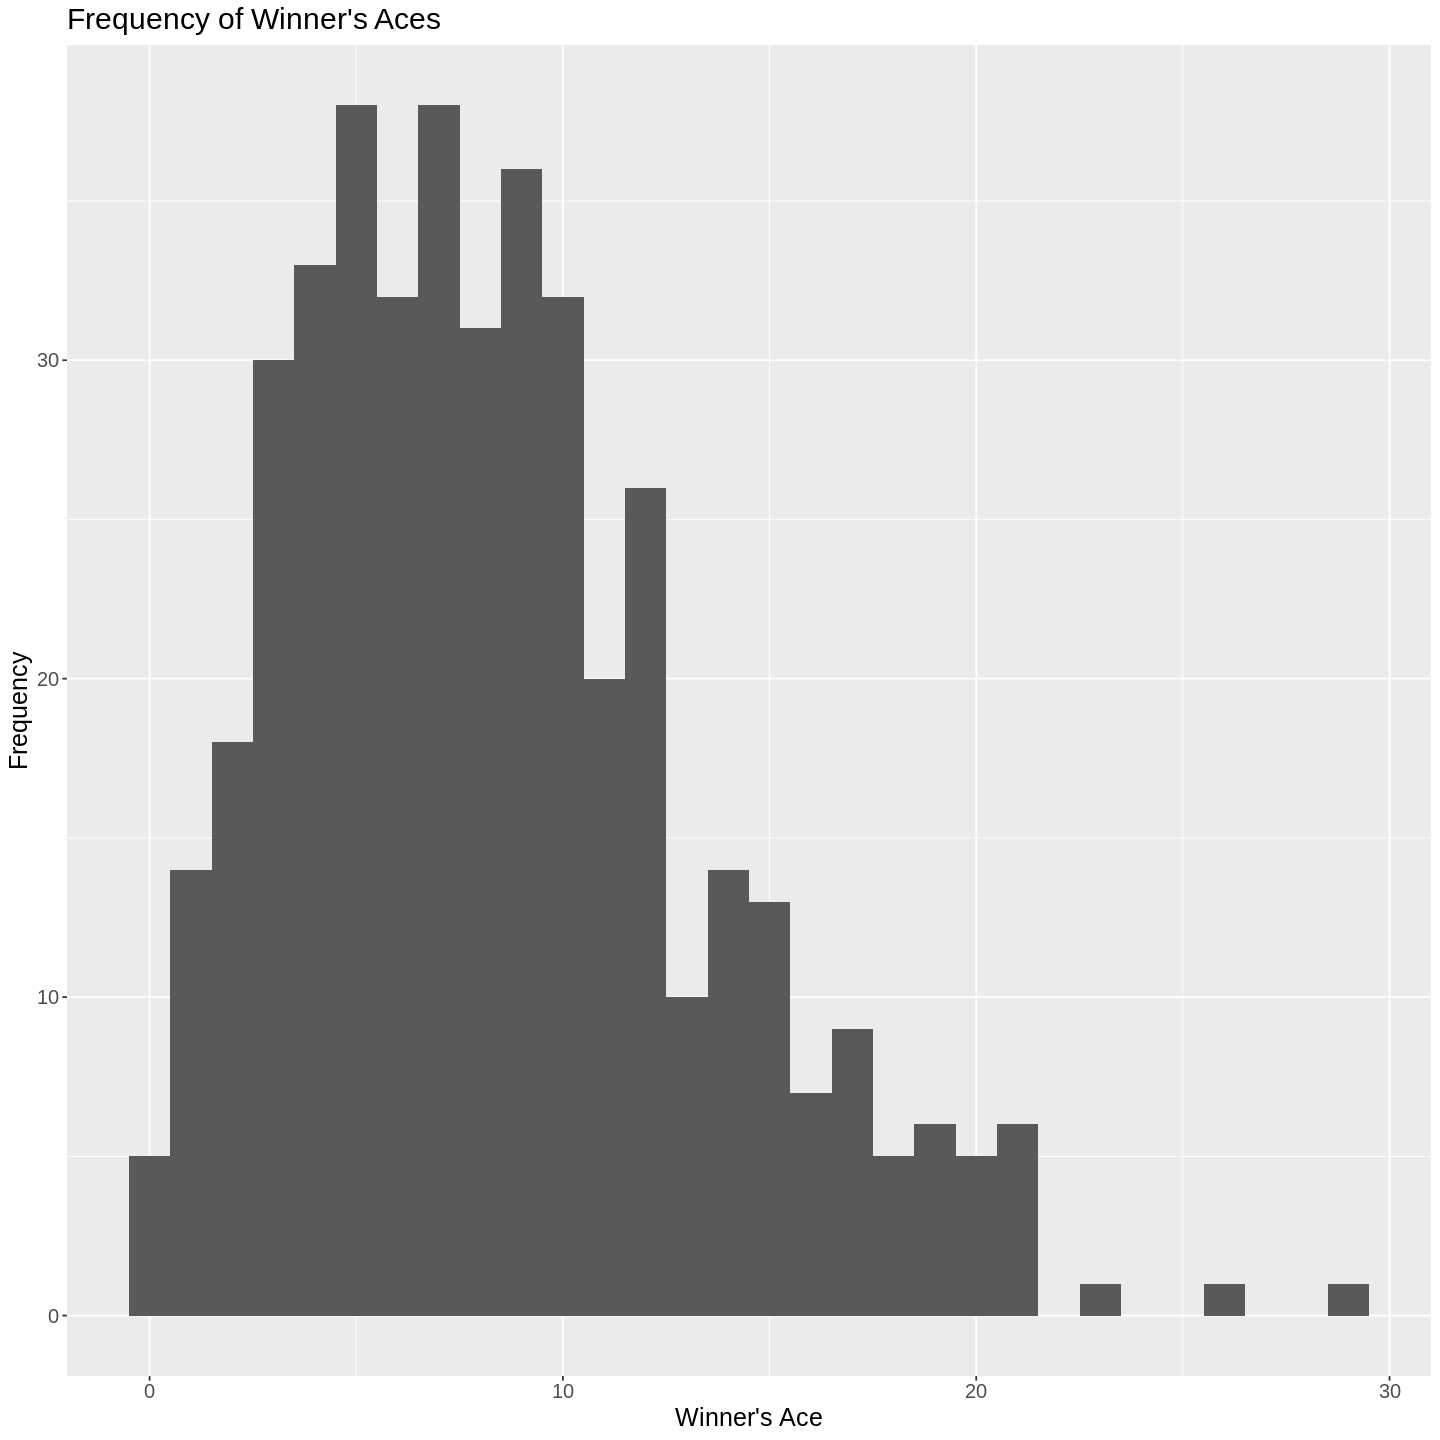

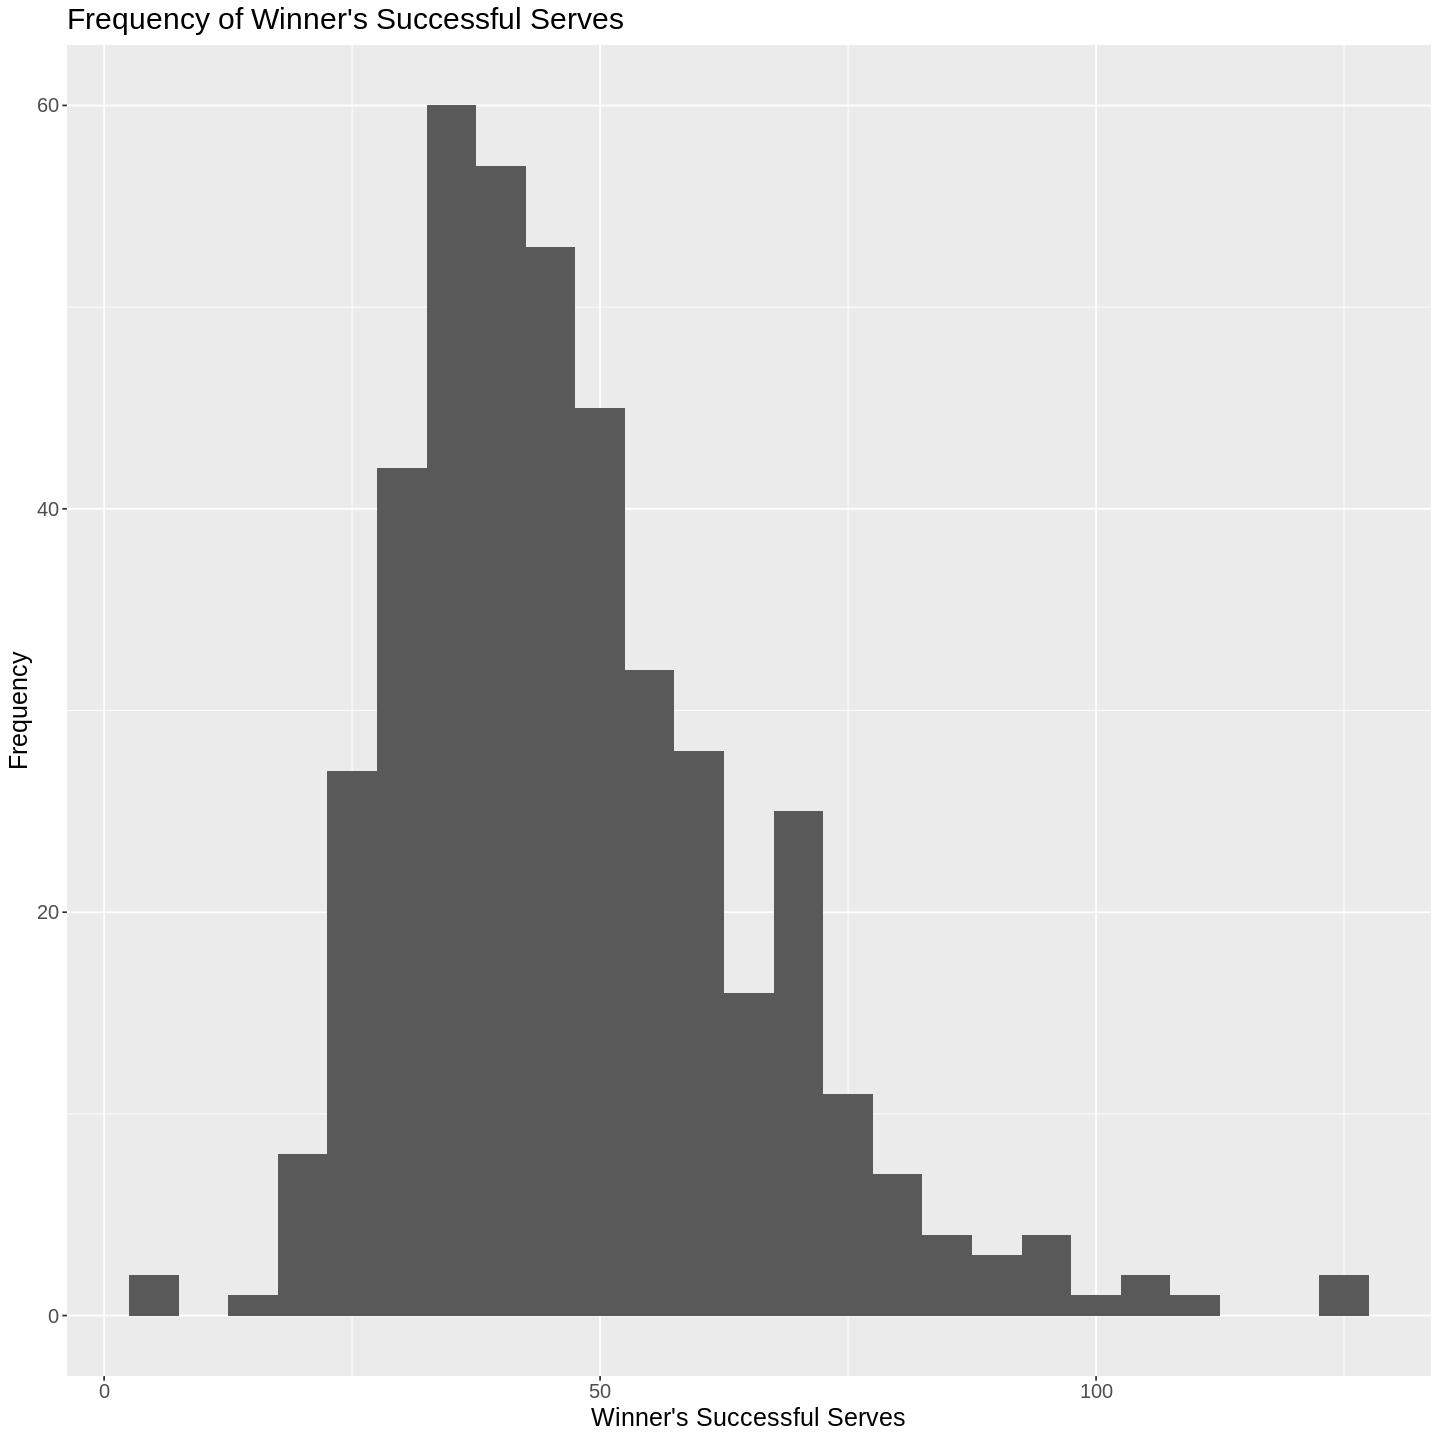

In [9]:
# Graphing each predictor variable on a Histogram


plot_data_1 <- ggplot(clean_data, aes(x = w_ace)) + 
    geom_histogram(bins = 30) +
    ggtitle("Frequency of Winner's Aces") +
    labs(x = "Winner's Ace", y = "Frequency") + 
    theme(text = element_text(size = 15))

plot_data_2 <- ggplot(clean_data, aes(x = w_1stIn)) + 
    geom_histogram(bins = 25) +
    ggtitle("Frequency of Winner's Successful Serves") +
    labs(x = "Winner's Successful Serves", y = "Frequency") + 
    theme(text = element_text(size = 15))



plot_data_1

plot_data_2

**Methods**

We will use variables of winner aces and winner successful first serves to predict the tournament level these French players played in. These are our variables of interest because prestigious tournaments such as the Grand Slam and Masters 1000s hosts highly skilled players; since the number of aces and successful serves are indicators of performance levels, using these predictors might result in reliable predictions of the tournament level. Using K-nearest neighbors, we will predict the classification of G, M, D, or A using known values of nearby observations. 


To visualize this relationship, we will graph winner aces on the x-axis, the successful serves for winners on the y-axis, and differentiate between the different tournament levels using color. The surface level plays a role in dictating aces and successful serves, this could act as a confounding variable giving us biased results. Hence, we will choose to examine games with hard surfaces only. 


**Expected Outcomes and Significance**


Using classification prediction, we expect to see that there will be an association between winner aces, the number of successful serves for winners, and the tournament level when playing on hard surfaces. These findings can be used to help professional tennis players. Players can find what level they belong in, in regards to how many aces they have scored and how many times they have successfully served. Future studies could predict the tournament level by comparing the match score and successful serves. This study begets a question regarding how these predictions vary across different surface types. 


**References (APA)**

Crim, J. (n.d.). Ace In Tennis. Tennis Companion. https://tenniscompanion.org/ace/#definition-of-ace 


Prowse, K. (2019, January 2). Love? Ace? Tennis Terminology Explained. Keith Prowse.https://www.keithprowse.co.uk/news-and-blog/2019/01/02/tennis-terminology-explained/#:~:text=Ace%20%E2%80%93%20A%20legal%20serve%20which,the%20server%20winning%20a%20point.&text=It%20means%20they%20will%20win,they%20win%20the%20following%20point 